In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error



%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
#imported both datasets

In [4]:
train = pd.read_csv('../datasets/train_clean.csv')

In [5]:
test = pd.read_csv('../datasets/test_clean.csv')

In [6]:
#created dummies

In [7]:
tmp_train_dum = pd.get_dummies(train['lot_shape'], drop_first=True)

In [8]:
tmp_test_dum = pd.get_dummies(train['lot_shape'],drop_first=True)

In [9]:
tmp_train_dum.columns

Index(['IR2', 'IR3', 'Reg'], dtype='object')

In [10]:
#joined dummies to original datafram
train = train.join(tmp_train_dum)
test = test.join(tmp_test_dum)

In [11]:
#added lot shape to my variables
features=['total_bsmt_sf','gr_liv_area', 'full_bath', 'half_bath', 'bsmt_full_bath',
        'bsmt_half_bath','wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
        '3ssn_porch', 'screen_porch','house_age','lot_area',
            'garage_cars','IR2', 'IR3', 'Reg']

In [12]:
X_train = train[features]
X_test = test[features]
y_train = train['saleprice']

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lr.coef_

array([ 3.47187923e+01,  6.64344380e+01, -1.86274499e+03, -2.54992841e+03,
        1.22759986e+04, -7.39450346e+02,  3.31456811e+01,  3.78226835e+01,
        3.80194126e+01,  5.45220494e+01,  1.03646999e+02, -6.94758513e+02,
        3.36117963e-01,  1.82591263e+04,  3.28423626e+03, -8.60098918e+04,
       -6.09788798e+03])

In [16]:
lr.intercept_

29607.630199532432

In [17]:
cross_val_score(lr, X_train, y_train,cv=5).mean()

0.7353373798034137

In [18]:
#R2 of 0.735. only slight improved over previous model

In [19]:
predictions = lr.predict(X_train)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

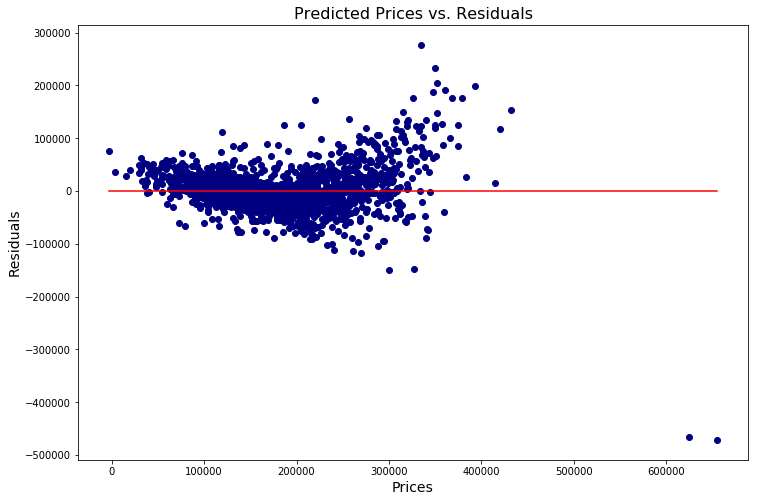

In [20]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [21]:
#standarize variables

In [22]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7487131787281385

In [24]:
#R2 of 0.749. slight improvement

In [25]:
predictions = lr.predict(X_train)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

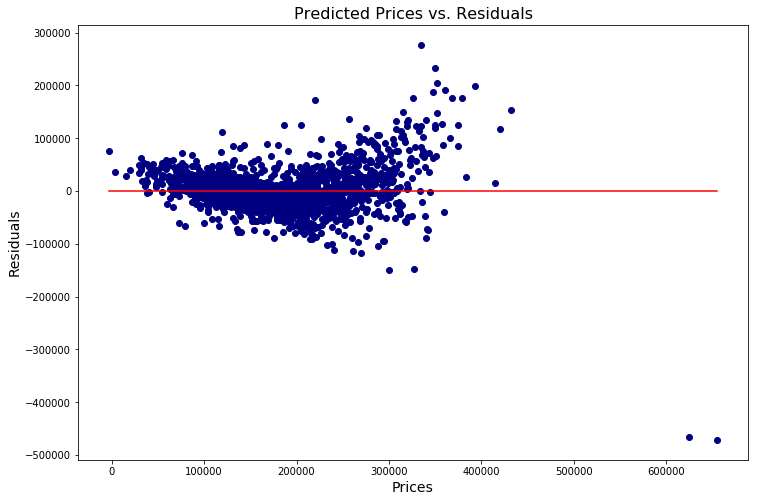

In [26]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [27]:
#reran model against X from the test set

In [28]:
test_predict = lr.predict(X_test)

In [29]:
#created a new dataframe for me submission 

In [30]:
submission = pd.DataFrame(columns=[])

In [31]:
submission['Id'] = test['id']
submission['SalePrice'] = test_predict

In [32]:
submission.to_csv('../submissions/submission_five.csv',index=False)